In [1]:
%run "../../shared/utilz_includez.ipynb"

# 1. Image Segmentation - Traditional Methods

E.G. as used in **scratch assay** or wound healing analysis to assess healing rate

**A. Histogram Based Segmentation**
- Uses differences in color

**B. Threshold Based Segmentation**
- Uses differences in edges or intensity or 
- Digital filters are a convolution with some type of kernel (and size). 
    - Kernels can be linear gaussian or non-linear like median. 
    - Typically, non-linear filters preserve edges

- `skimage.filters.entropy`: Threshold on amount of disorder

In [22]:
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk 

## try different thresholds
from skimage.filters import try_all_threshold

In [6]:
def plot_image( img_array , cmapd='gray'):     
    print( f"image.shape = {img_array.shape}" ) 
    print( f"datatype = {img_array.dtype}")
    print( f"min = {np.min(img_array)} , max = {np.max(img_array)}\n" )
    if cmapd:
        plt.imshow( img_array , cmap=cmapd)
    else:
        plt.imshow( img_array )

image.shape = (914, 1200)
datatype = uint8
min = 0 , max = 255

image.shape = (914, 1200)
datatype = float64
min = 0.20538331050339706 , max = 7.230937415183527



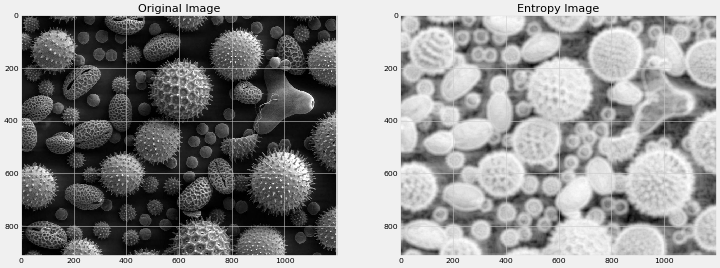

In [8]:
imgpath = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Misc_pollen.jpg/1200px-Misc_pollen.jpg"
img = io.imread( imgpath)
entrop_img = entropy( img, disk(10))

plt.subplot(1, 2, 1)
plot_image(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plot_image(entrop_img)
plt.title('Entropy Image'); 

In [16]:
imgpath = "https://upload.wikimedia.org/wikipedia/commons/4/48/Dh3-RD.jpg"

img = io.imread( imgpath, as_gray=True)

image.shape = (1090, 1036)
datatype = float64
min = 0.06216470588235295 , max = 1.0

image.shape = (1090, 1036)
datatype = float64
min = 1.6592385559699923 , max = 7.283272085422588

image.shape = (1090, 1036)
datatype = float64
min = 2.7639670418203313 , max = 7.5711793603198965



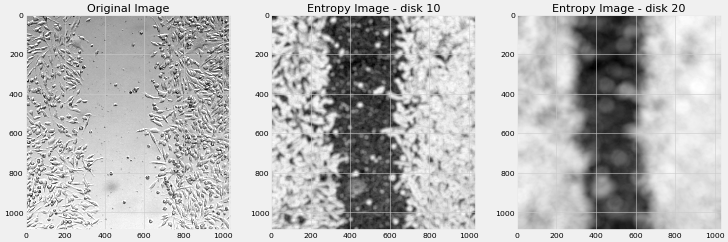

In [42]:
entrop_img = entropy( img, disk(40)) ## play with disk size to adjst - increase to blur more and generate more intensity distinction
e10img = entropy( img, disk(10)) ## play with disk size to adjst - increase to blur more and generate more intensity distinction

plt.subplot(1, 3, 1)
plot_image(img)
plt.title('Original Image')

d = 10
plt.subplot(1, 3, 2)
plot_image( entropy( img, disk(d)) )
plt.title(f'Entropy Image - disk {d}'); 

plt.subplot(1, 3, 3)
plot_image(entrop_img)
plt.title('Entropy Image - disk 20'); 

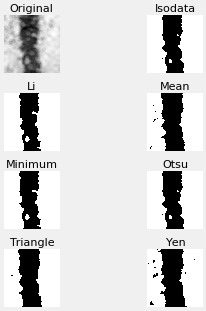

In [40]:
## With different thresholds on the entropy image
fig, ax = try_all_threshold( entrop_img , figsize=(10,8) , verbose=False) 

image.shape = (1090, 1036)
datatype = bool
min = False , max = True

image.shape = (1090, 1036)
datatype = bool
min = False , max = True

image.shape = (1090, 1036)
datatype = bool
min = False , max = True



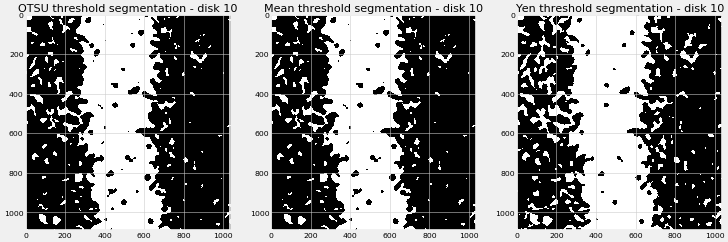

In [44]:
plt.subplot(1, 3, 1)
plot_image( e10img <= threshold_otsu( e10img ) )
plt.title('OTSU threshold segmentation - disk 10'); 

plt.subplot(1, 3, 2)
plot_image( e10img <= threshold_otsu( e10img ) )
plt.title('Mean threshold segmentation - disk 10'); 

plt.subplot(1, 3, 3)
plot_image( e10img <= threshold_yen( e10img ) )
plt.title('Yen threshold segmentation - disk 10'); 

image.shape = (853, 850)
datatype = bool
min = False , max = True

image.shape = (853, 850)
datatype = bool
min = False , max = True

image.shape = (853, 850)
datatype = bool
min = False , max = True



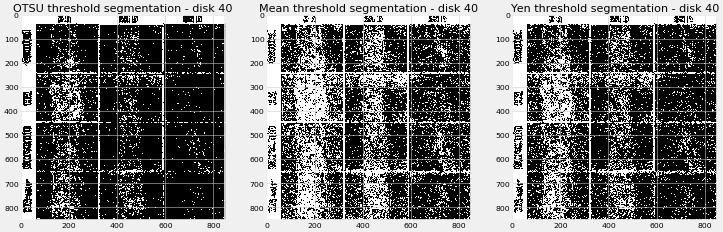

In [345]:
from skimage.filters import threshold_minimum, threshold_yen, threshold_otsu, threshold_mean
 
plt.subplot(1, 3, 1)
plot_image( entrop_img <= threshold_otsu( entrop_img ) )
plt.title('OTSU threshold segmentation - disk 40'); 

plt.subplot(1, 3, 2)
plot_image( entrop_img <= threshold_mean( entrop_img ) )
plt.title('Mean threshold segmentation - disk 40'); 

plt.subplot(1, 3, 3)
plot_image( entrop_img <= threshold_yen( entrop_img ) )
plt.title('Yen threshold segmentation - disk 40' ); 

In [49]:
### Can then keep track of size of the scratch by calc % of image that is light over time. It should decrease as it heals
print( f"% pixels light OTSU disk 40: { np.mean(entrop_img <= threshold_otsu( entrop_img )  )}")
print( f"% pixels light MEAN disk 40: { np.mean(entrop_img <= threshold_mean( entrop_img )) }")
print( f"% pixels light YEN disk 40: { np.mean(entrop_img <= threshold_yen( entrop_img )) }")

% pixels light OTSU disk 40: 0.30780879175374587
% pixels light MEAN disk 40: 0.347724133045234
% pixels light YEN disk 40: 0.3692518862243633


## Scratch Assay Analaysis

image.shape = (853, 850)
datatype = float64
min = 0.00784313725490196 , max = 1.0



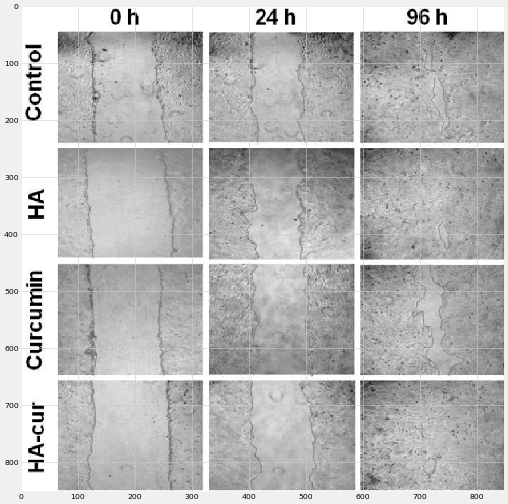

In [53]:
impath = "https://www.researchgate.net/profile/Surya_Singh34/publication/318762290/figure/fig2/AS:669338625376290@1536594172996/Phase-contrast-microscopic-images-of-HaCaT-cell-scratch-wounds-with-different-treatments.png"

all_img = io.imread( impath, as_gray=True)
plot_image( all_img)

image.shape = (130, 775)
datatype = float64
min = 0.06694941176470588 , max = 1.0



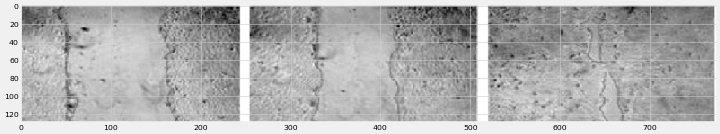

In [61]:
t1_img = all_img[ 50:180, 75:850, ]
plot_image( t1_img)

w = 273
image.shape = (130, 198)
datatype = float64
min = 0.06694941176470588 , max = 0.9100866666666667

image.shape = (130, 198)
datatype = float64
min = 0.06694941176470588 , max = 0.9523905882352941

image.shape = (130, 198)
datatype = float64
min = 0.06694941176470588 , max = 0.9327827450980393



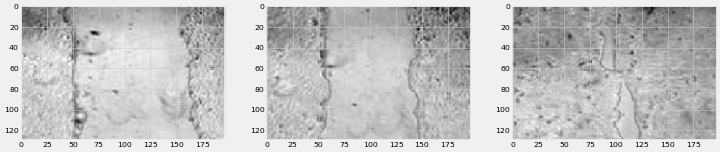

In [70]:
w = int( np.round( (850 - 75)/3, 0) )+15
print( f"w = {w}")
t1_img = all_img[ 50:180, 75:w ]
t2_img = all_img[ 50:180, 75+w:w*2 ]
t3_img = all_img[ 50:180, 75+w*2:w*3 ]

plt.subplot(1,3,1)
plot_image( t1_img)

plt.subplot(1,3,2)
plot_image( t2_img)

plt.subplot(1,3,3)
plot_image( t3_img);

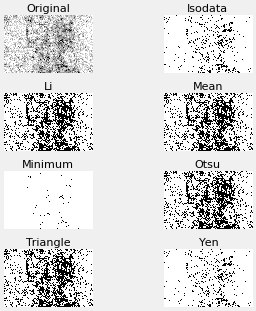

In [86]:
entrop_img = entropy( t1_img, disk(1))
fig, ax = try_all_threshold( entrop_img , figsize=(10,8) , verbose=False) 

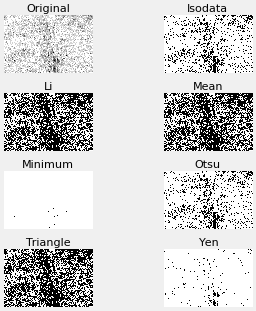

In [85]:
entrop_img = entropy( t3_img, disk(1))
fig, ax = try_all_threshold( entrop_img , figsize=(10,8) , verbose=False) 

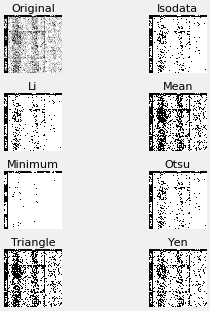

In [89]:
entrop_img = entropy( all_img, disk(1))
fig, ax = try_all_threshold( entrop_img , figsize=(10,8) , verbose=False) 

**Use disk 1 and threshold_minimum** 
- Wound areas are now the dark areas

In [340]:
from scipy.stats import linregress

def run_sassy(threshold=threshold_minimum, tname="Minimum", diski=1):
    rez = {}
    groupz = 4
    t_recz = 3 
    n = t_recz
    n_colz = t_recz
    n_rowz = groupz * (1 + t_recz) + 2 # plus two rows for the trend lines
    
    
    fig = plt.figure( figsize=(20, 90) ) #, sharex=True, sharey=True )
    grid = plt.GridSpec( n_rowz, n_colz)

    for g in range(4):
        h = (240 - 40)*g 
        strip = all_img[ 40+h +(g*10):240+h, 75:850 ]

        gi = groupz*g + 2
        plt.subplot( grid[gi, :] )
        plt.imshow( strip , cmap='gray')
        plt.title(f"Strip at group {g} { ' (0=control)' if g == 0 else '' }" )

        w = int( np.round( (850 - 75 - 35)/n, 0) ) 

        gi = (gi + 1) * (t_recz )

        for i in range(n):
            ti = strip[ :, (i*w)+(i*15):w*(i+1) ] 

            e_img = entropy( ti, disk( diski ) )            
            thresh  = threshold( ti ) 
            rez[f'{g}_{i}'] = np.mean( e_img <= thresh )

            plt.subplot( n_rowz, n_colz, gi+(1+(i*n)) )
            plt.imshow(ti, cmap='gray')
            plt.axis('off')
            plt.title(f'original at t={i}')        

            plt.subplot( n_rowz, n_colz, gi+(2+(i*n)) )
            plt.imshow(e_img, cmap='gray')
            plt.axis('off')
            plt.title(f'entropy at t={i}')        

            plt.subplot( n_rowz, n_colz, gi+(3+(i*n)) )
            plt.imshow(e_img <= thresh, cmap='gray')
            plt.axis('off')
            plt.title(f'thresholded at t={i}')        
    
    x = [ int(k.split('_')[1]) for k in rez.keys() ]
    h = [ f"group {k.split('_')[0]}" for k in rez.keys() ]
    y = list( rez.values() )
    plt.subplot( grid[0:2, :] )
    sns.lineplot(x, y, h); 
    plt.title(f"Healing Rate by Treatment Group - {tname} Threshold with disk = {diski}"); 
    
    plt.savefig( f"{tname}_sassy.png")
    
#     print( f"{rez}\n\n {linregress(x, y)}")
    
    

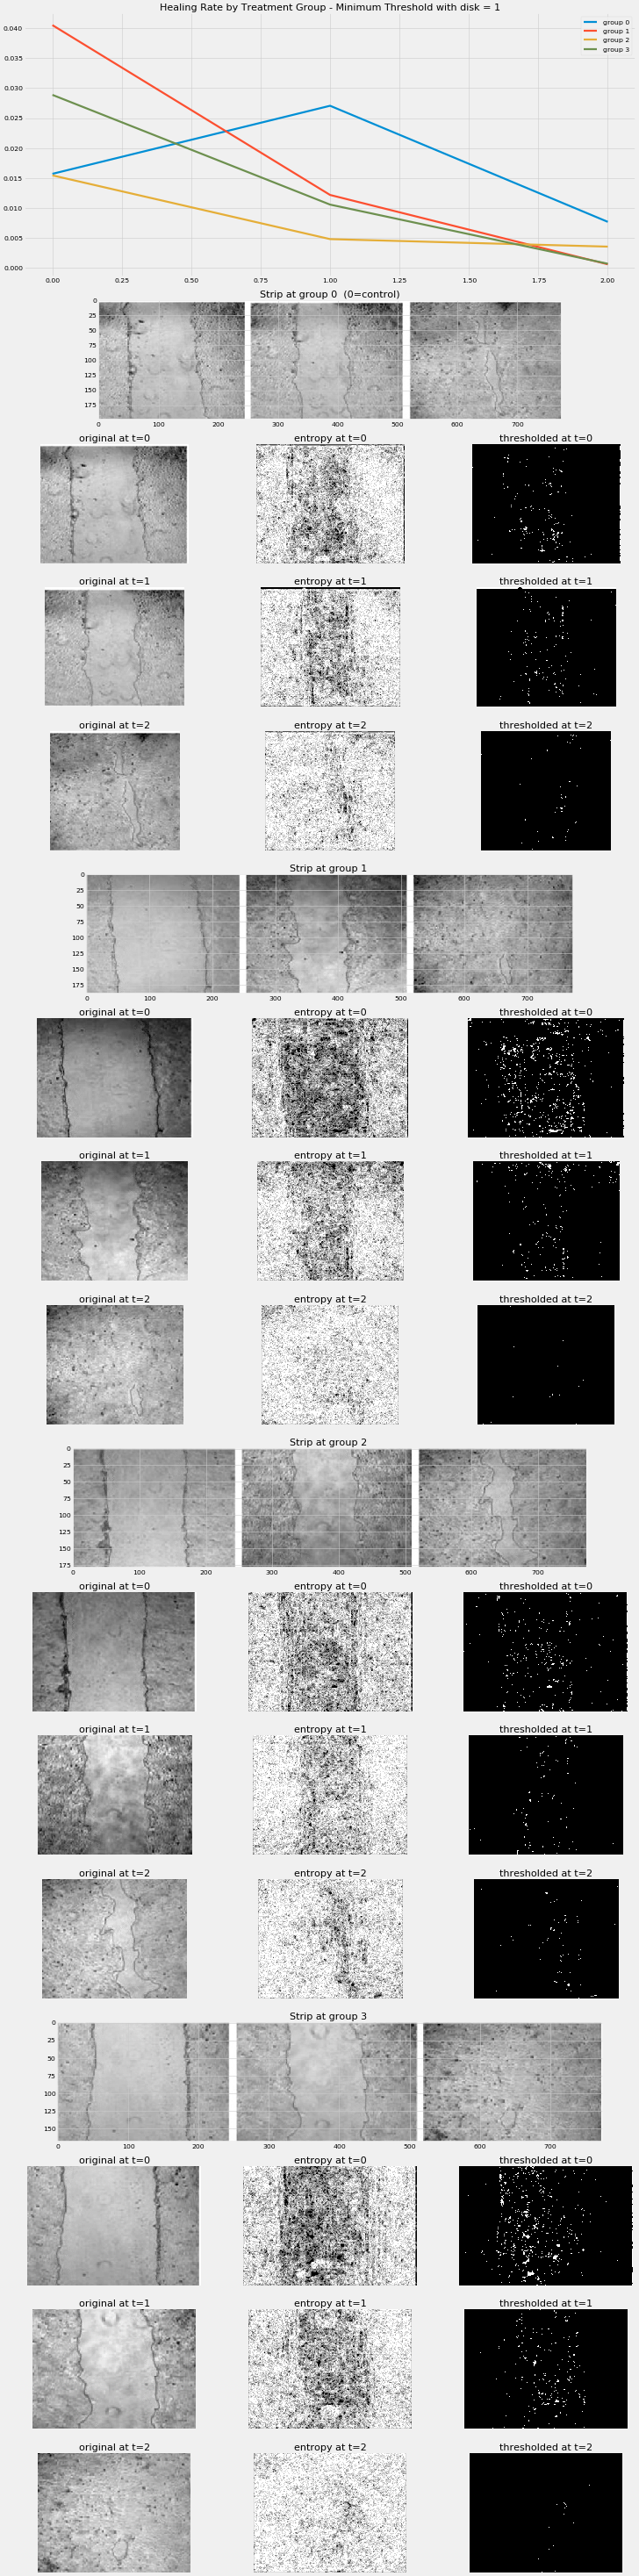

In [341]:
### 1. with minimum threshold
run_sassy()

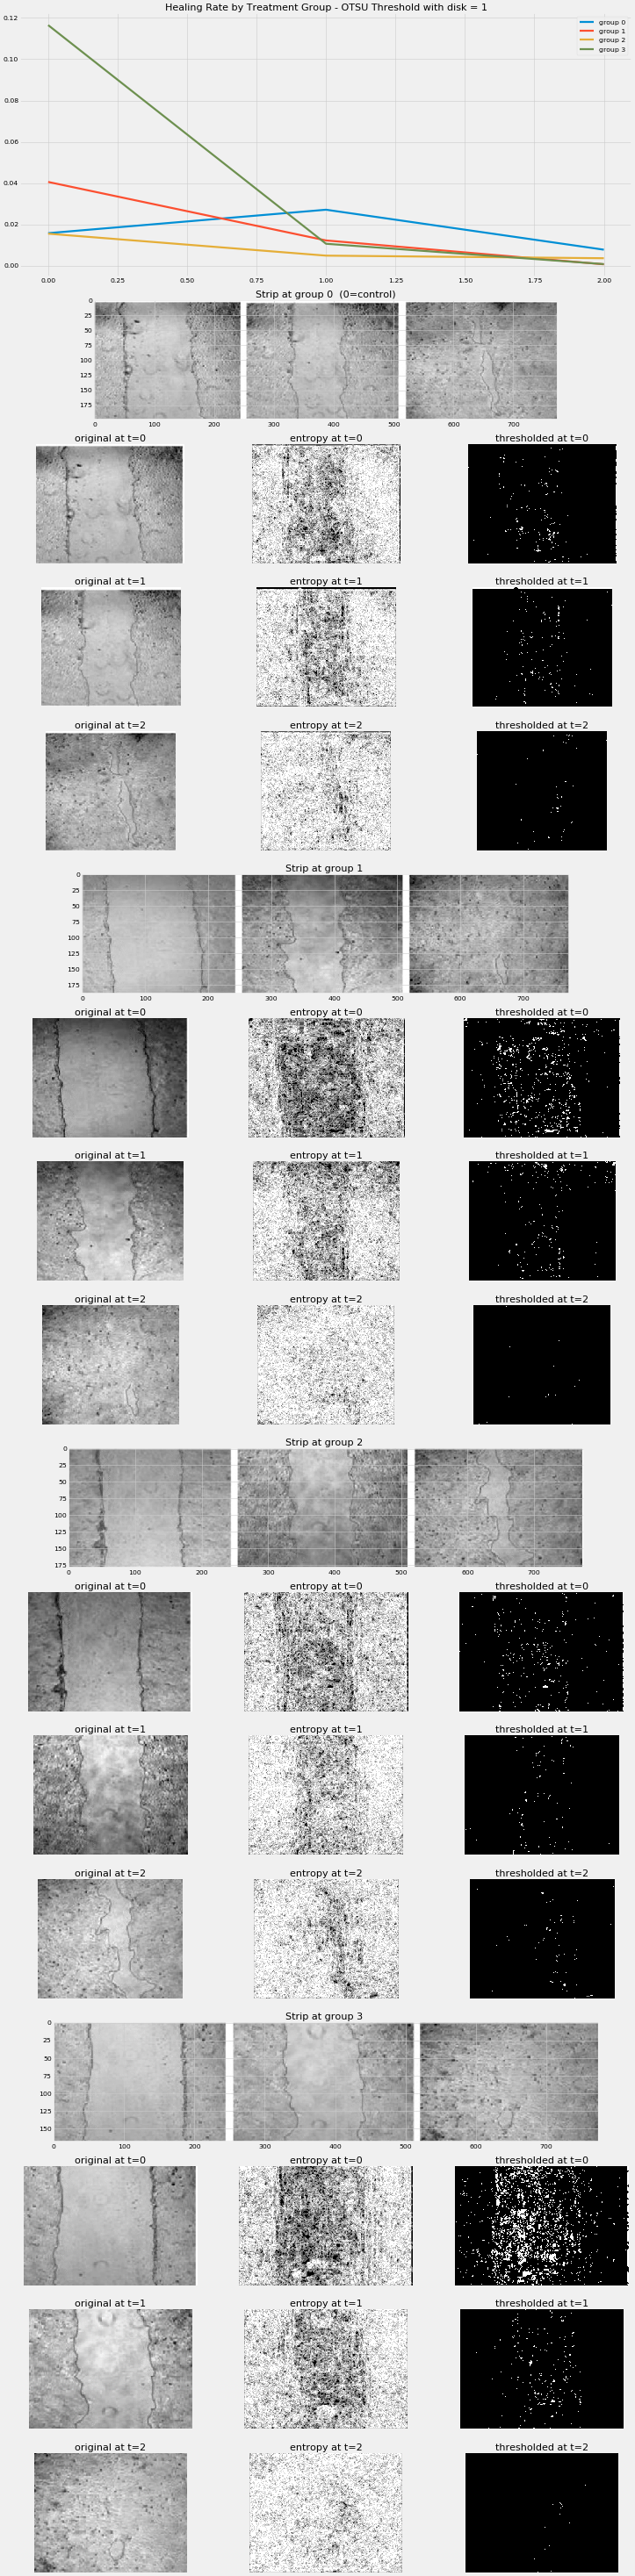

In [342]:
run_sassy( threshold_otsu, 'OTSU')

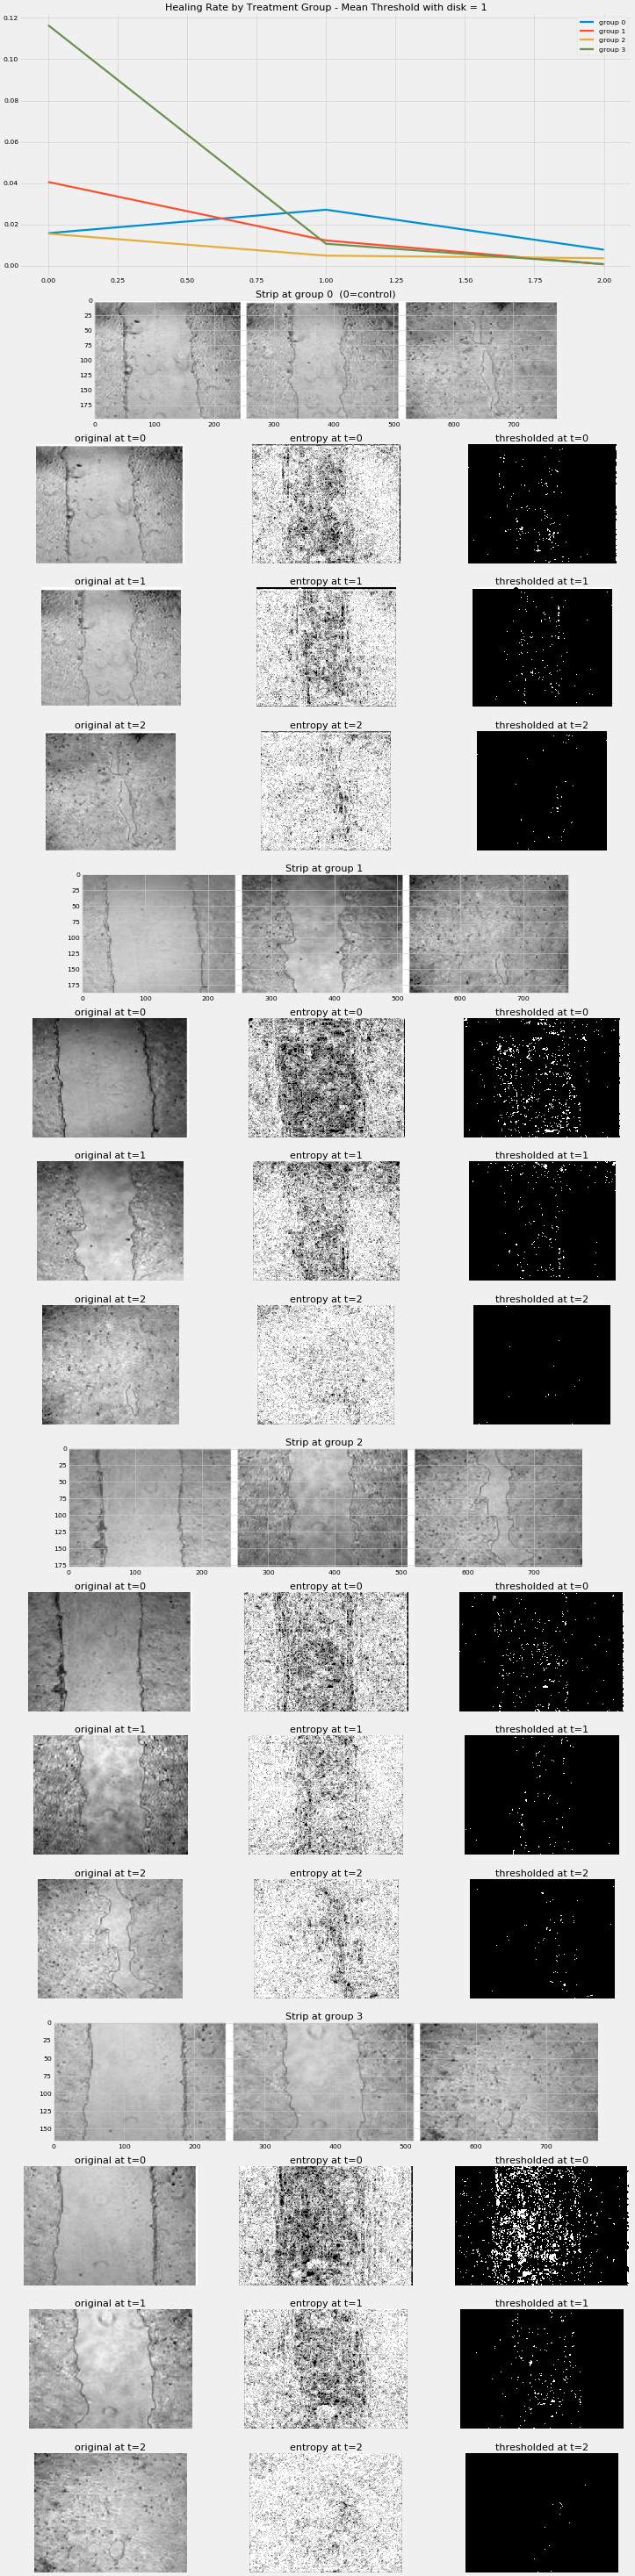

In [343]:
run_sassy( threshold_mean, 'Mean', 1)